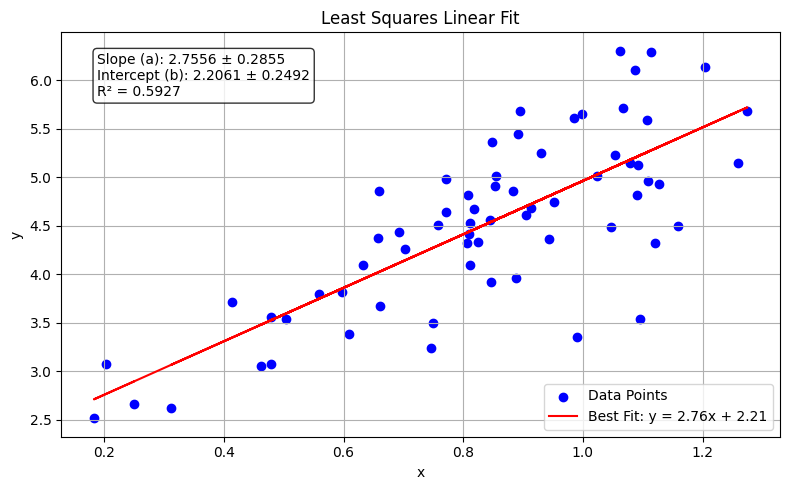

'y = 2.755585044926133x + 2.206071468598694 , The uncertainty in a is 0.2855445610088966 and the uncertainty in b is 0.24918200972444418 and the R^2 value is 0.592688528442338 '

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt




data = np.loadtxt('data01-1.txt', delimiter='\t')
x = data[:,0]
y = data[:,1]
xy = x*y # array of x * y values to calculate later

def least_linear_squares(x,y):
  # x: array of x values
  # y: array of y values

# this is a test comment for github
  # initialize sum variables
  sum_x = 0
  sum_y = 0
  sum_xy = 0
  sum_xx = 0
  sum_dev = 0

  for i in x: # for loop to get the avg of x
    sum_x += i
  x_avg = sum_x / len(x)
  for i in y: # for loop to get the avg of y
    sum_y += i
  y_avg = sum_y / len(y)
  for i in x: # for loop to get the avg of x**2
    sum_xx += i*i
  x2_avg = sum_xx / len(x)
  for i in xy: # for loop to get the avg of x*y
    sum_xy += i
  xy_avg = sum_xy / len(x)

  a = (xy_avg - x_avg*y_avg)/(x2_avg-x_avg**2) # calculates a
  b = (x2_avg*y_avg - x_avg*xy_avg)/(x2_avg - x_avg**2) # calculates b



  yi = a*x+b
  dev = y - yi



  for i in dev:  # calculates deviation
    sum_dev += i*i
  dev_avg = sum_dev / len(dev)

  R2 = 1- ((np.sum((y - yi)**2))/(np.sum((y-y_avg)**2))) #formula to calculate R^2 value




  uncertainty_a = math.sqrt(((1 / (len(x)-2))*(dev_avg / (x2_avg-x_avg**2)))) #calculates the uncertainty in a
  uncertainty_b = math.sqrt((1 / (len(x)-2))*((dev_avg * x2_avg)/(x2_avg - x_avg**2)))



  plt.figure(figsize=(8, 5))
  plt.scatter(x, y, color='blue', label='Data Points')
  plt.plot(x, yi, color='red', label=f'Best Fit: y = {a:.2f}x + {b:.2f}')
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title("Least Squares Linear Fit")
  plt.legend()
  plt.grid(True)
  plt.text(
          0.05, 0.95,
          f"Slope (a): {a:.4f} ± {uncertainty_a:.4f}\n"
          f"Intercept (b): {b:.4f} ± {uncertainty_b:.4f}\n"
          f"R² = {R2:.4f}",
          transform=plt.gca().transAxes,
          verticalalignment='top',
          bbox=dict(boxstyle="round", facecolor="white", alpha=0.8)
          )
  plt.tight_layout()
  plt.show()


  return f"y = {a}x + {b} , The uncertainty in a is {uncertainty_a} and the uncertainty in b is {uncertainty_b} and the R^2 value is {R2} " # returns the function based of that data inputed with slope and y intercept

least_linear_squares(x,y)

